In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [158]:
# Load data
weights = pd.read_excel('optimal_portfolio/tickers_weights.xlsx', sheet_name=0, index_col='Tickers')['Weights']
df_log = pd.read_excel('optimal_portfolio/log_returns.xlsx', sheet_name=0, parse_dates=['Date'], index_col='Date')
bench = pd.read_excel('benchmark/ftse_balance_prices.xlsx',
                      sheet_name=0,
                      parse_dates=['Date'],
                      index_col='Date').sort_index(ascending=True)


In [159]:
# Change from log to simple returns
df_simple = np.exp(df_log) - 1

bench_simple = bench['Last Price'].pct_change().dropna()
bench_log    = np.log(bench['Last Price'] / bench['Last Price'].shift(1)).dropna()


# Compute daily portfolio simple return

port_simple = df_simple.dot(weights)

In [160]:
# Align series
df = pd.DataFrame({
    'Portfolio': port_simple,
    'Benchmark': bench_simple
}).dropna()

In [161]:
# Metrics
days = 252
rf = 0.0456

In [162]:
# Cumulative simple return
cum = (1 + df).prod() - 1

# Annualized return: (1+cum)^(252/N) - 1
years = len(df) / days
ann_ret = (1 + cum) ** (1/years) - 1

# Annualized vol of simple returns
vol = df.std() * np.sqrt(days)

# Excess return over rf
excess = ann_ret - rf

# Sharpe ratio
sharpe = excess / vol

# Max drawdown
wealth_index = (1 + df).cumprod()
rolling_max = wealth_index.cummax()
drawdown = (wealth_index - rolling_max) / rolling_max
max_dd = drawdown.min()

/var/folders/k0/9514c2kj447cm58pbj7ncbpw0000gn/T/ipykernel_10703/3711703833.py:20: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  .applymap(lambda x: f"{x:.2%}" if isinstance(x, float) else x)


                  Portfolio Benchmark Difference
Cumulative Return    35.74%    17.55%     18.19%
Annual Return        12.26%     6.31%      5.95%
Volatility            7.35%     7.65%     -0.29%
Excess Return         7.70%     1.75%      5.95%
Sharpe Ratio        104.70%    22.87%     81.83%
Max Drawdown         -7.77%    -9.29%      1.51%


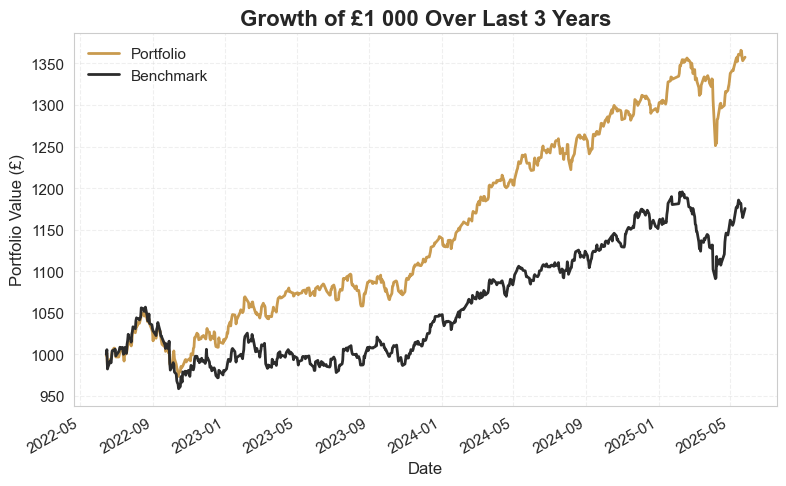

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# (1) Build your metrics table in raw form
metrics = pd.DataFrame({
    'Cumulative Return': cum,
    'Annual Return':     ann_ret,
    'Volatility':        vol,
    'Excess Return':     excess,
    'Sharpe Ratio':      sharpe,
    'Max Drawdown':      max_dd
}).T
metrics.columns       = ['Portfolio', 'Benchmark']
metrics['Difference'] = metrics['Portfolio'] - metrics['Benchmark']

# Format and print
metrics_display = metrics.copy()
metrics_display[['Portfolio','Benchmark','Difference']] = (
    metrics_display[['Portfolio','Benchmark','Difference']]
    .applymap(lambda x: f"{x:.2%}" if isinstance(x, float) else x)
)
print(metrics_display)

# (2) Plot growth of £1 000 with explicit colours
fig, ax = plt.subplots(figsize=(8,5))

# Scale to £1 000
series = wealth_index[['Portfolio','Benchmark']].mul(1000)

# Plot: Portfolio in gold, Benchmark in cool gray
series['Portfolio'].plot(ax=ax, color='#C99A4E', label='Portfolio', linewidth=2)
series['Benchmark'].plot(ax=ax, color='#2C2C2C', label='Benchmark', linewidth=2)

# Titles and labels
ax.set_title("Growth of £1 000 Over Last 3 Years", fontsize=16, weight='bold')
ax.set_xlabel("Date", fontsize=12)
ax.set_ylabel("Portfolio Value (£)", fontsize=12)

# Grid and legend
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(frameon=False, fontsize=11)

plt.tight_layout()
plt.savefig('figures/portfolio_vs_benchmark.png', dpi=300)
plt.show()

In [164]:
weights

Tickers
EMHG          0.070000
JGSA          0.150000
UBTP          0.100000
SGLN          0.130000
WMVG LN       0.140000
TECW LN       0.120000
GOAIGBIV      0.010000
ARTGEIG LN    0.099809
PARAQPG LX    0.040000
CUKX LN       0.050000
VGSESIE ID    0.090191
Name: Weights, dtype: float64

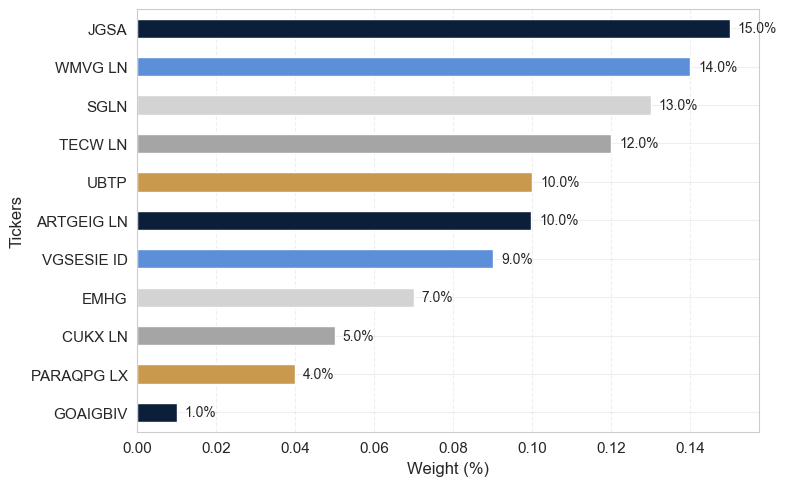

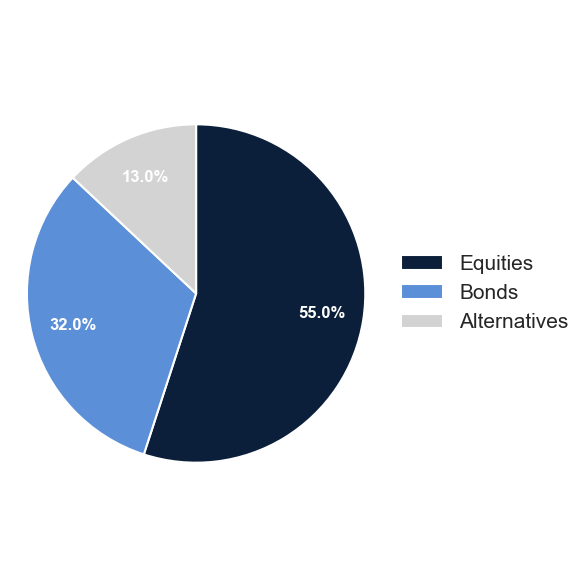

In [169]:
import matplotlib.pyplot as plt

# 1) Figure: Position Weights Bar Chart
fig, ax = plt.subplots(figsize=(8, 5), facecolor="white")

large_w.plot.barh(
    ax=ax,
    color=colors_tickers[:len(large_w)],
    edgecolor="white"
)
for p in ax.patches:
    ax.text(
        p.get_width() + 0.002,
        p.get_y() + p.get_height()/2,
        f"{p.get_width():.1%}",
        va="center", ha="left",
        fontsize=10
    )

ax.set_xlabel("Weight (%)", fontsize=12)
ax.invert_yaxis()  # largest on top
ax.grid(axis="x", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.savefig("figures/position_weights_bar.png", dpi=300)
plt.show()


# 2) Figure: Asset‐Class Allocation Pie Chart
fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")

wedges, texts, autotexts = ax.pie(
    cls_wser,
    labels=None,
    autopct="%1.1f%%",
    pctdistance=0.75,
    startangle=90,
    counterclock=False,
    colors=colors_classes,
    wedgeprops=dict(edgecolor="white", linewidth=1.5)
)

# Style %‐labels in‐slice
for txt in autotexts:
    txt.set_color("white")
    txt.set_fontsize(12)
    txt.set_fontweight("bold")

# Legend for categories
ax.legend(
    wedges,
    cls_wser.index,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=15
)

ax.axis("equal")  # keep as circle

plt.tight_layout()
plt.savefig("figures/asset_class_allocation_pie.png", dpi=300)
plt.show()